In [132]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

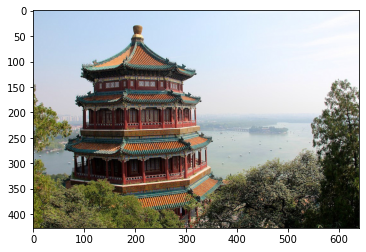

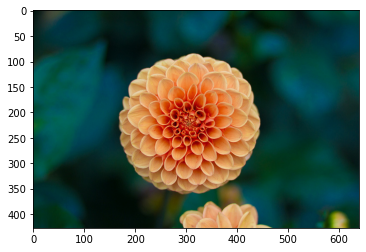

In [205]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china,flower])
plt.imshow(china)
plt.show()
plt.imshow(flower)

In [147]:
batch_size, height, width, channels = images.shape

print(images.shape)

(2, 427, 640, 3)


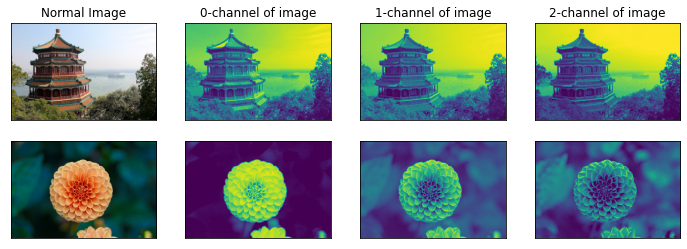

In [202]:
fig, ax = plt.subplots(2,4,figsize=(12,4))
# Removing ticks and labels all the images
for row_ax in ax:
  for img_ax in row_ax:
    img_ax.set_xticks([])
    img_ax.set_yticks([])

# images[a,b,c,d]
# a = image index in the 'images' list
# b = height of the image 
# c = width of the image
# d = channel(s) red green or blue

ax[0,0].set_title("Normal Image")
ax[0,0].imshow(images[0,:,:,:])
ax[0,1].set_title("0-channel of image")
ax[0,1].imshow(images[0,:,:,0])
ax[0,2].set_title("1-channel of image")
ax[0,2].imshow(images[0,:,:,1])
ax[0,3].set_title("2-channel of image")
ax[0,3].imshow(images[0,:,:,2])

ax[1,0].imshow(images[1,:,:,:])
ax[1,1].imshow(images[1,:,:,0])
ax[1,2].imshow(images[1,:,:,1])
ax[1,3].imshow(images[1,:,:,2])

In [203]:
#creating 2 filters
filters = np.zeros(shape=(3,3,channels,2),dtype=np.float32)
filters[:, :1, :, 0] = 1 #vertical filter
filters[:, 2:, :, 0] = -1
filters[:1, :, :, 1] = 1 #horizontal filter
filters[2:, :, :, 1] = -1

print("------VERTICAL FILTER-------\n")
print(filters[:,:,0,0])
# fitlers[a,b,c,d]
# a = filter height (ROWS)
# b = filter width (COLUMNS)
# c = filter channel R G B for RGB images, value ranges from 0 - 2

print("\n------HORIZONTAL FILTER-------\n")
print(filters[:,:,0,1])


filters_big = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters_big[:, 3, :, 0] = 1 #vertical filter
filters_big[3, :, :, 1] = 1 #horizontal filter


print("------VERTICAL FILTER-------\n")
print(filters_big[:,:,0,0])

print("\n------HORIZONTAL FILTER-------\n")
print(filters_big[:,:,0,1])

------VERTICAL FILTER-------

[[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]

------HORIZONTAL FILTER-------

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
------VERTICAL FILTER-------

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]

------HORIZONTAL FILTER-------

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


(2, 427, 640, 2)


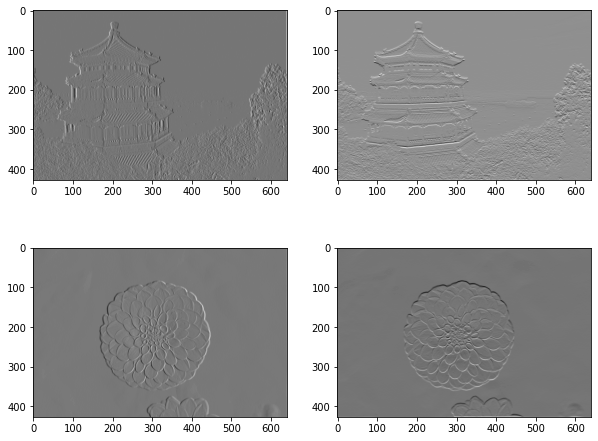

In [216]:
outputs = tf.nn.conv2d(images,filters,strides=1,padding="SAME")
print(outputs.shape)
edges_figure, edges_axes = plt.subplots(2,2,figsize=(10,8))

for x in range(2):
  for y in range(2):
    edges_axes[x,y].imshow(outputs[x, :, :, y], cmap="gray")

(2, 86, 128, 2)


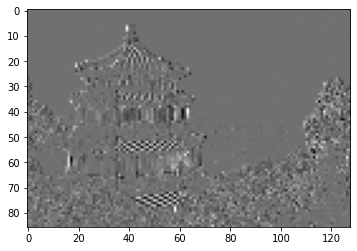

In [209]:
outputs = tf.nn.conv2d(images,filters,strides=5,padding="SAME")
print(outputs.shape)
plt.imshow(outputs[0, :, :, 0], cmap="gray")

Increasing the stride is equivalent to decreasing the resolution of the image. As you can see the height and width of the resulting image changes and therefore the image becomes pixelated.

Traning a CNN to identify the images in the fashion MNIST dataset, the dataset has 10 labels.

In [217]:
print(tf.__version__)

# Getting the data
mnist = keras.datasets.fashion_mnist

# Loading the data
(training_images, training_labels), (test_images, test_labels) =
 mnist.load_data()

# Normalizing the data
# reshaping the data because the first convolution in our model expects
# a 4D tensor
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images /255

# Building the model layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compiling the model using an adam optimizer and measuring the loss using
# sparse categorical crossentropy 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# To the get the details of the layers of the model, it displays dimensions and
# the number of parameters being learnt, along with the layer name
model.summary()

# The model is trained as a batch of 32 images in 1875 batches,
# 32 * 1875 = 60,000
model.fit(training_images,training_labels,epochs=5)

# Evaluating the model performance on test set
test_loss = model.evaluate(test_images,test_labels)

2.3.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)         

This exercise is to visualize the images and how they are being seen by the model and how it is learning different parameters, We see the images at different layers and with different filters on them. We realize how different filters on the same image detect different features. We also see how size of the image at each layer matches the dimensions of that layer from the summary of the model.

In [238]:
def get_indices_of_labels(label):
  
  count = 0
  indices = []
  for i in test_labels[:100]:
    if i == label:
      indices.append(count)
    count += 1
  return indices[:3]

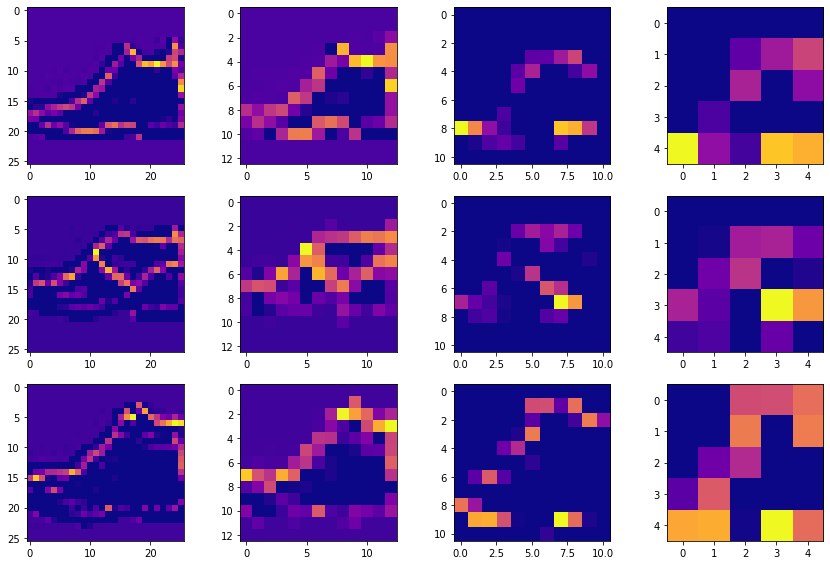

In [267]:
f, axarr = plt.subplots(3,4,figsize=(12,8))

# For space between the images 
f.tight_layout()

image_index = get_indices_of_labels(9)

FIRST_IMAGE=image_index[0]
SECOND_IMAGE=image_index[1]
THIRD_IMAGE=image_index[2]

# Convolution number is the filter number it ranges from 0 - 63 (for 64 filters)
CONVOLUTION_NUMBER = 0

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

# Making a model that gives the outputs for each layers so that we can see the 
# images as they move through the layers
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# 4 because 4 layers Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D 
for x in range(0,4):
  
  # Getting the prediction for a particular image
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]

  # f1[a, b, c, d]
  # a = the channel of the image for these b/w images only one channel
  # b = height of the image 
  # c = width of the image
  # d = convolution_number (the filter number from 64 filters)
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')

  # No grid inside the image
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')
  axarr[2,x].grid(False)

Taking the same image and using different filters to prove how each filter detects a different feature of the image.

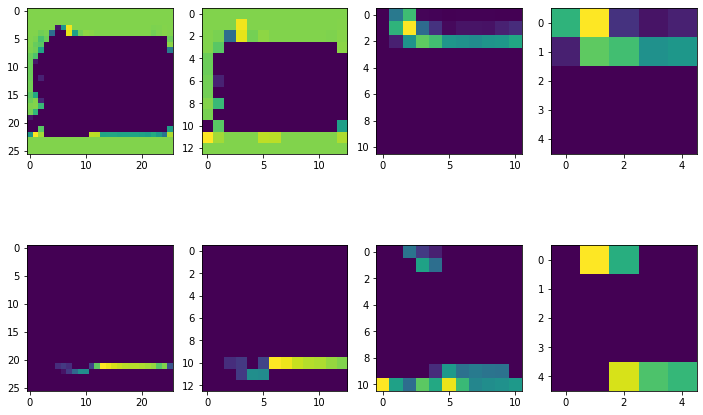

In [283]:
exp_f, exp_ax = plt.subplots(2,4,figsize=(12,8))

EXP_IMAGE = 18

CONVOLUTION_NUMBER_1 = 1
CONVOLUTION_NUMBER_2 = 3

# not training a model again because we already have on

for x in range(4):

  f1 = activation_model.predict(test_images[EXP_IMAGE].reshape(1, 28, 28, 1))[x]
  exp_ax[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER_1])

  f2 = activation_model.predict(test_images[EXP_IMAGE].reshape(1, 28, 28, 1))[x]
  exp_ax[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER_2])




The image of a handbag is seen differently by the two different filters, one filter detects the top the handbag while other detects the bottom.
The CONVOLUTION_NUMBER can be changed to see outputs for other filters

In [284]:
activation_model.outputs

[<tf.Tensor 'conv2d_9/Relu:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_3/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_6/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_7/Softmax:0' shape=(None, 10) dtype=float32>]

As you can see the activation model gives outputs of all the layers for the image we can even check the last layer output to see the prediction of the model.

In [285]:
activation_model.predict(test_images[18].reshape(1,28,28,1))[6]

array([[6.5766020e-05, 9.2293986e-09, 4.9218884e-06, 1.6767837e-08,
        2.2711868e-06, 2.5147260e-09, 1.6794782e-05, 7.7285278e-10,
        9.9991000e-01, 1.8838290e-07]], dtype=float32)

In [288]:
model.predict(test_images[18].reshape(1,28,28,1))

array([[6.5766020e-05, 9.2293986e-09, 4.9218884e-06, 1.6767837e-08,
        2.2711868e-06, 2.5147260e-09, 1.6794782e-05, 7.7285278e-10,
        9.9991000e-01, 1.8838290e-07]], dtype=float32)

As you can see the activation model is simply giving the output of all the layers, where as model gives only the final output using indexing we get same outputs for both the models. The image is a handbag because index 8 has the largest value.